In [317]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import profile_report
from sklearn.datasets import fetch_openml

In [318]:
df = fetch_openml(data_id=1220)

### Chuẩn hóa dữ liệu:

In [319]:
X = pd.DataFrame(df['data'],columns=df['feature_names']).astype('float')
y = pd.Series(df['target']).astype('int')

In [320]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39948 entries, 0 to 39947
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   impression      39948 non-null  float64
 1   ad_id           39948 non-null  float64
 2   advertiser_id   39948 non-null  float64
 3   depth           39948 non-null  float64
 4   position        39948 non-null  float64
 5   keyword_id      39948 non-null  float64
 6   title_id        39948 non-null  float64
 7   description_id  39948 non-null  float64
 8   user_id         39948 non-null  float64
dtypes: float64(9)
memory usage: 2.7 MB


In [321]:
X.profile_report()

Summarize dataset:   0%|          | 0/22 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Áp dụng với dữ liệu raw

In [322]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.utils.validation import column_or_1d

In [323]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25,random_state= 42)

In [324]:
model1= GaussianNB()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)

In [325]:
#đánh giá model và dữ liệu
print('Toàn bộ dữ liệu: ',model1.score(X,y))
print('Toàn bộ train: ',model1.score(X_train,y_train))
print('Toàn bộ test: ',model1.score(X_test,y_test))

Toàn bộ dữ liệu:  0.8084509862821668
Toàn bộ train:  0.8086512466206068
Toàn bộ test:  0.8078502052668469


In [326]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_recall_fscore_support,roc_auc_score,roc_curve

In [327]:
print('Accuracy: ', accuracy_score(y_test, y_pred)*100,'%')
print('Confustion matrix: \n', confusion_matrix(y_test,y_pred))
print('Classification report:\n', classification_report(y_test,y_pred))

Accuracy:  80.78502052668469 %
Confustion matrix: 
 [[7992  313]
 [1606   76]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.96      0.89      8305
           1       0.20      0.05      0.07      1682

    accuracy                           0.81      9987
   macro avg       0.51      0.50      0.48      9987
weighted avg       0.73      0.81      0.75      9987



In [328]:
y_prob = model1.predict_proba(X_test)

In [329]:
print('ROC :',roc_auc_score(y_test,y_prob[:,1]))

ROC : 0.549416529875775


In [330]:
fpr,tpr,threshold = roc_curve(y_test,y_prob[:,1])

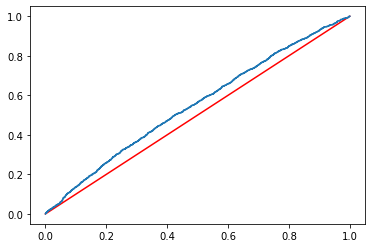

In [331]:
plt.plot([0,1],[0,1],'r')
plt.plot(fpr,tpr);

### Áp dụng Under Sampling

In [332]:
from imblearn.under_sampling import RandomUnderSampler

In [333]:
sampling = RandomUnderSampler()

In [334]:
X_under, y_under = sampling.fit_resample(X_train,y_train)

In [335]:
#re-check
y_under.value_counts()

1    5046
0    5046
dtype: int64

In [336]:
model2= GaussianNB()
model2.fit(X_under,y_under)
y_u_pred = model2.predict(X_test)

In [337]:
#đánh giá model và dữ liệu
print('Toàn bộ dữ liệu: ',model2.score(X,y))
print('Toàn bộ train: ',model2.score(X_under,y_under))
print('Toàn bộ test: ',model2.score(X_test,y_test))

Toàn bộ dữ liệu:  0.7311755281866427
Toàn bộ train:  0.5249702734839476
Toàn bộ test:  0.7297486732752578


In [338]:
print('Accuracy: ', accuracy_score(y_test, y_u_pred)*100,'%')
print('Confustion matrix: \n', confusion_matrix(y_test,y_u_pred))
print('Classification report:\n', classification_report(y_test,y_u_pred))

Accuracy:  72.97486732752579 %
Confustion matrix: 
 [[6923 1382]
 [1317  365]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.83      0.84      8305
           1       0.21      0.22      0.21      1682

    accuracy                           0.73      9987
   macro avg       0.52      0.53      0.52      9987
weighted avg       0.73      0.73      0.73      9987



In [339]:
y_u_prob = model2.predict_proba(X_test)

In [340]:
print('ROC :',roc_auc_score(y_test,y_u_prob[:,1]))

ROC : 0.5505628530583054


In [341]:
fpr,tpr,threshold = roc_curve(y_test,y_u_prob[:,1])

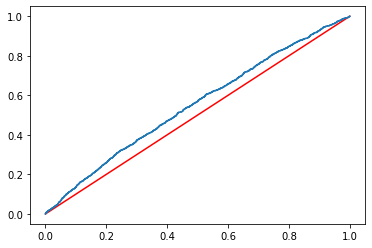

In [342]:
plt.plot([0,1],[0,1],'r')
plt.plot(fpr,tpr);

##### Nhận xét:
Under sampling không giúp cải thiện mô hình

### Áp dụng Over Sampling`

In [343]:
from imblearn.over_sampling import RandomOverSampler

In [344]:
Sampling = RandomOverSampler()

In [345]:
X_over,y_over = Sampling.fit_resample(X_train,y_train)

In [346]:
model3= GaussianNB()
model3.fit(X_over,y_over)
y_o_pred = model3.predict(X_test)

In [347]:
#đánh giá model và dữ liệu
print('Toàn bộ dữ liệu: ',model3.score(X,y))
print('Toàn bộ train: ',model3.score(X_over,y_over))
print('Toàn bộ test: ',model3.score(X_test,y_test))

Toàn bộ dữ liệu:  0.736106939020727
Toàn bộ train:  0.5223158739715031
Toàn bộ test:  0.7346550515670371


In [348]:
print('Accuracy: ', accuracy_score(y_test, y_o_pred)*100,'%')
print('Confustion matrix: \n', confusion_matrix(y_test,y_o_pred))
print('Classification report:\n', classification_report(y_test,y_o_pred))

Accuracy:  73.46550515670371 %
Confustion matrix: 
 [[6994 1311]
 [1339  343]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.84      0.84      8305
           1       0.21      0.20      0.21      1682

    accuracy                           0.73      9987
   macro avg       0.52      0.52      0.52      9987
weighted avg       0.73      0.73      0.73      9987



In [349]:
y_o_prob = model3.predict_proba(X_test)

In [350]:
print('ROC :',roc_auc_score(y_test,y_o_prob[:,1]))

ROC : 0.5496113539900107


In [351]:
fpr,tpr,threshold = roc_curve(y_test,y_o_prob[:,1])

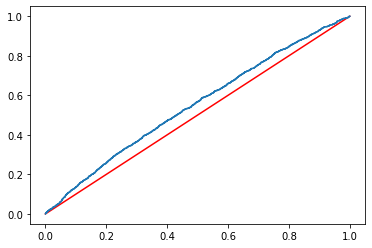

In [352]:
plt.plot([0,1],[0,1],'r')
plt.plot(fpr,tpr);

##### Nhận xét:
Không cải thiện khi over sampling.

### Áp dụng Boosting

In [353]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [372]:
model = AdaBoostClassifier(n_estimators=100,base_estimator = GaussianNB())

In [373]:
model.fit(X_over,y_over)
#model.fit(X_train,y_train)

AdaBoostClassifier(base_estimator=GaussianNB(), n_estimators=100)

In [374]:
y_o_pred = model.predict(X_test)

In [375]:
print('Toàn bộ dữ liệu: ',model.score(X,y))
print('Toàn bộ train: ',model.score(X_over,y_over))
#print('Toàn bộ train: ',model.score(X_train,y_train))
print('Toàn bộ test: ',model.score(X_test,y_test))

Toàn bộ dữ liệu:  0.4939921898468008
Toàn bộ train:  0.5030503712622918
Toàn bộ test:  0.49584459797737057


In [376]:
print('Accuracy: ', accuracy_score(y_test, y_o_pred)*100,'%')
print('Confustion matrix: \n', confusion_matrix(y_test,y_o_pred))
print('Classification report:\n', classification_report(y_test,y_o_pred))

Accuracy:  49.584459797737054 %
Confustion matrix: 
 [[4064 4241]
 [ 794  888]]
Classification report:
               precision    recall  f1-score   support

           0       0.84      0.49      0.62      8305
           1       0.17      0.53      0.26      1682

    accuracy                           0.50      9987
   macro avg       0.50      0.51      0.44      9987
weighted avg       0.72      0.50      0.56      9987



In [377]:
y_o_prob = model.predict_proba(X_test)

In [378]:
print('ROC :',roc_auc_score(y_test,y_o_prob[:,1]))

ROC : 0.4964795644072128


In [379]:
fpr,tpr,threshold = roc_curve(y_test,y_o_prob[:,1])

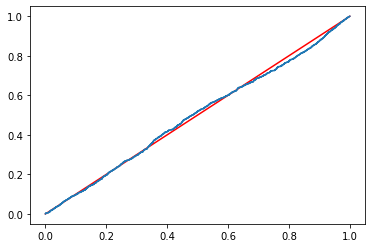

In [380]:
plt.plot([0,1],[0,1],'r')
plt.plot(fpr,tpr);

Nhận xét: Sử dụng Ada Boosting với base là Naive Bayes cũng không giúp cải thiện bài toán. Cần đổi sang thuật toán khác 
    